# GitHub API Visual Summary (3 Plots)
This notebook fetches data using the GitHub REST API and produces three simple plots:
1. Top repositories
2. Recent commits
3. File types in a repo

In [ ]:
import sys
import os 
sys.path.append(os.path.abspath("../Content"))
# 🔐 Setup: insert your GitHub Personal Access Token manually here
TOKEN = '[INTRODUCE YOUR GitHub Personal Access Token(PAT)]'  # Replace with your own token (keep private!)

from auth_and_helpers import GitHubClient
client = GitHubClient(TOKEN)

## 1 · Top Repositories

[RateLimit] exhausted → sleeping 27s …


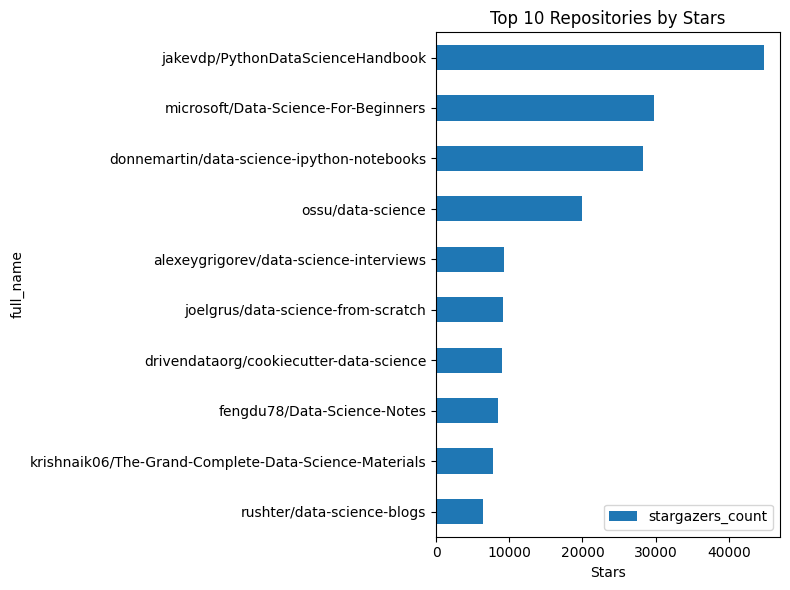

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

query = 'data science'
repos = list(client.search_repositories(q=f'{query} in:name', sort='stars', per_page=30))
repos_df = pd.DataFrame(repos)
top_repos = repos_df[['full_name', 'stargazers_count']].sort_values(by='stargazers_count', ascending=False).head(10)

top_repos.plot.barh(x='full_name', y='stargazers_count', figsize=(8, 6))
plt.title('Top 10 Repositories by Stars')
plt.xlabel('Stars')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 2 · Recent Commits

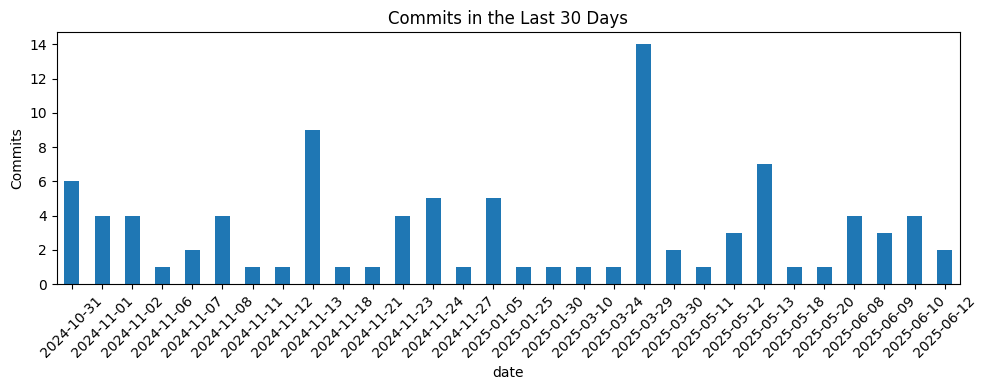

In [16]:
repo_owner, repo_name = 'pallets', 'flask'
commits = list(client.commits(repo_owner, repo_name, per_page=100))
commits_df = pd.json_normalize(commits)
commits_df['date'] = pd.to_datetime(commits_df['commit.author.date'])
commits_by_day = commits_df.groupby(commits_df['date'].dt.date).size()

commits_by_day.tail(30).plot(kind='bar', figsize=(10, 4))
plt.title('Commits in the Last 30 Days')
plt.ylabel('Commits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3 · File Types in Repository Root

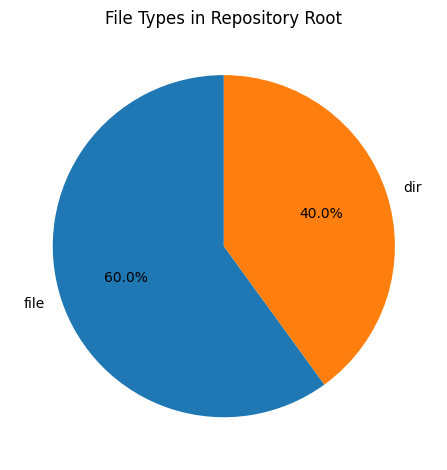

In [17]:
owner, repo = 'pallets', 'flask'
contents = list(client.contents(owner, repo, path=''))
contents_df = pd.DataFrame(contents)
file_types = contents_df['type'].value_counts()

file_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('File Types in Repository Root')
plt.ylabel('')
plt.tight_layout()
plt.show()